In [131]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy




In [132]:
#Empty list for Latititud and Longigtude
lat_lng= []

#Empty list for holding the citites names
cities=["kerikeri","ginir","margaret river ","bam", "marrakesh"]

#Range of latittude and longitudes
lat_range=(-90,90)
lng_range= (-180,180)

#A set of random lat and lng combinations
lats=np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs=np.random.uniform(lng_range[0],lng_range[1], size=1500)
lat_lngs_comb=zip(lats,lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_comb:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    #if the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

print(f"Number of cities in the list:{len(cities)}")

Number of cities in the list:611


In [133]:
# API base url
url= "http://api.openweathermap.org/data/2.5/weather"


# Emptylist to fetch weather data
city_data=[]

# Print to logger
print("beginning Data Retrieval      ")
print("------------------------------")

# Counters
record_count= 1
set_count= 1 



# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count+=0
    # Create endpoint URL with each city
    city_url= f"{url}?q={city}&appid={weather_api_key}&units=metric"


# Log url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count+=1


    # Run API request for each city 
    try:
        response = requests.get(city_url)
        response.raise_for_status()
        
        
        # Parse the JSON and retrieve data
        city_weather=response.json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append information into data list.
        city_data.append({"City":city,
                          "Lat":city_lat, 
                          "lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date})
    except Exception as e:
        # This block executes if an error occurs in the try block
        print(f"City not found or an error occurred for {city}. Skipping... Error: {e}")
        # Optionally, you can use 'continue' here to move to the next city
        continue
    # Pause command
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete,      ")
print("-----------------------------")
print(city_data)

beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | kerikeri
Processing Record 2 of Set 1 | ginir
Processing Record 3 of Set 1 | margaret river 
Processing Record 4 of Set 1 | bam
Processing Record 5 of Set 1 | marrakesh
Processing Record 6 of Set 1 | lata
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | bethanie
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | gunnedah
Processing Record 12 of Set 1 | gueltat zemmour
City not found or an error occurred for gueltat zemmour. Skipping... Error: 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=gueltat%20zemmour&appid=265135540842c373b6e3887ec9bf2d40&units=metric
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | victorica
Processing Record 16 of Set 1 | adamstown
Processing Reco

In [134]:
city_data_df=pd.DataFrame(city_data)
city_data_df.count()

City          592
Lat           592
lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [135]:
# Display sample data
city_data_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kerikeri,-35.2268,173.9474,14.95,87,4,1.62,NZ,1738680492
1,ginir,7.1333,40.7000,21.55,11,10,5.59,ET,1738680494
2,margaret river,-33.9500,115.0667,18.54,69,0,5.87,AU,1738680495
3,bam,29.1060,58.3570,11.83,22,0,3.61,IR,1738680496
4,marrakesh,31.6315,-8.0083,18.04,39,0,2.57,MA,1738680497


In [136]:
# Export the City_Data into a csv
city_data_df.to_csv("../cities.csv", index_label="City_ID")

In [137]:
# Read saved data
city_data_df = pd.read_csv("../cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.95,87,4,1.62,NZ,1738680492
1,ginir,7.1333,40.7000,21.55,11,10,5.59,ET,1738680494
2,margaret river,-33.9500,115.0667,18.54,69,0,5.87,AU,1738680495
3,bam,29.1060,58.3570,11.83,22,0,3.61,IR,1738680496
4,marrakesh,31.6315,-8.0083,18.04,39,0,2.57,MA,1738680497


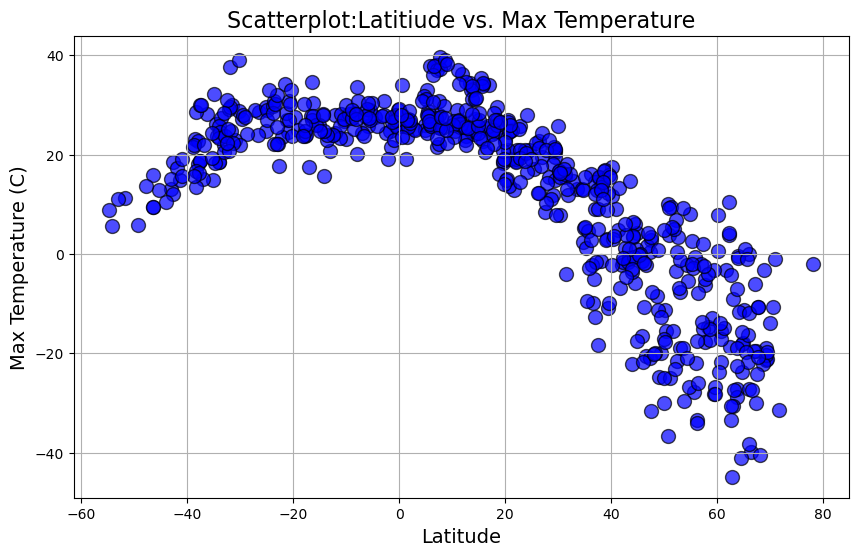

In [173]:
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],
            c='blue',             # marker color
            edgecolor='black',   # marker edge color
            s=100,               # marker size
            alpha=0.7)           # transparency

# Other Graph Propertie
plt.title("Scatterplot:Latitiude vs. Max Temperature", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=14)
plt.grid(True)

plt.show()


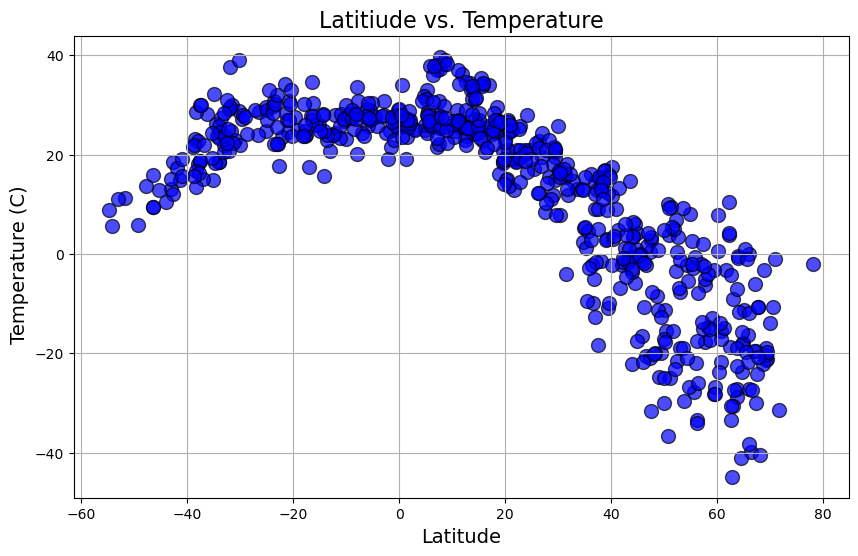

In [174]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],
            c='blue',             # marker color
            edgecolor='black',   # marker edge color
            s=100,               # marker size
            alpha=0.7)           # transparency

# Other Graph Propertie
plt.title("Latitiude vs. Temperature", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel(" Temperature (C)", fontsize=14)
plt.grid(True)



# Save the figure
plt.savefig("../Fig1.png")

# Show plot
plt.show()

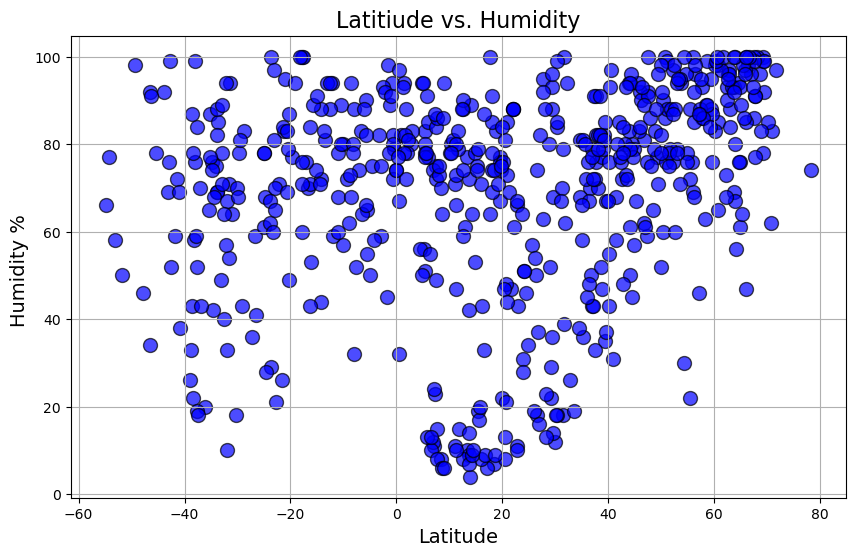

In [175]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],
            c='blue',             # marker color
            edgecolor='black',   # marker edge color
            s=100,               # marker size
            alpha=0.7)           # transparency

# Incorporate the other graph properties
plt.title("Latitiude vs. Humidity", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity % ", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("../Fig2.png")

# Show plot
plt.show()

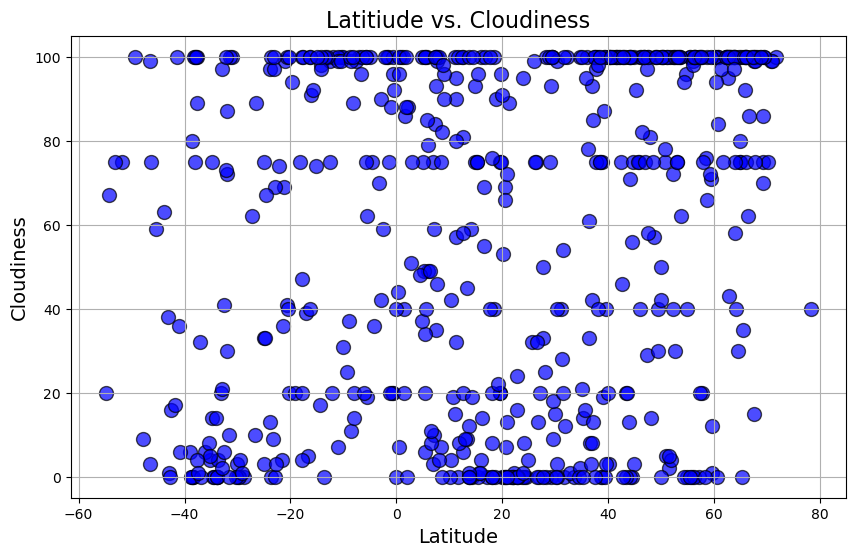

In [176]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],
            c='blue',             # marker color
            edgecolor='black',   # marker edge color
            s=100,               # marker size
            alpha=0.7)           # transparency

# Incorporate the other graph properties
plt.title("Latitiude vs. Cloudiness", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("../Fig3.png")

# Show plot
plt.show()

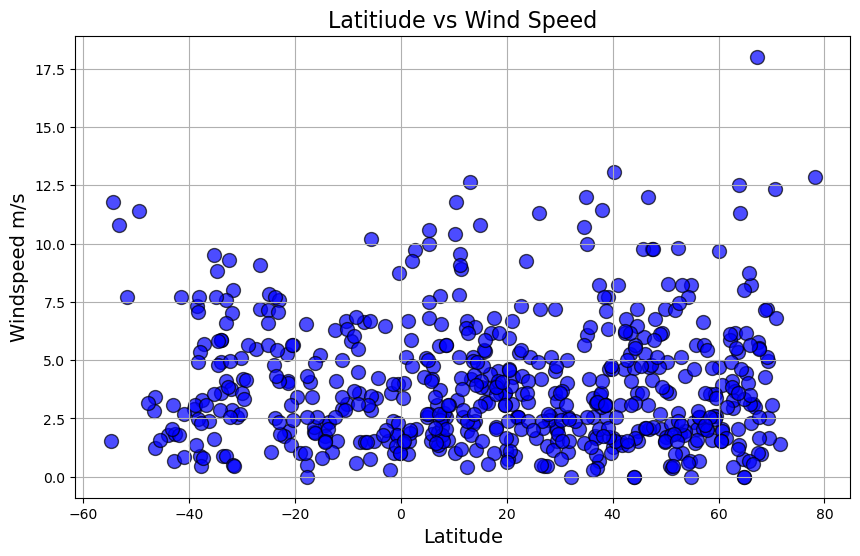

In [177]:
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],
            c='blue',             # marker color
            edgecolor='black',   # marker edge color
            s=100,               # marker size
            alpha=0.7)           # transparency

# Incorporate the other graph properties
plt.title("Latitiude vs Wind Speed", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Windspeed m/s", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("../Fig4.png")

# Show plot
plt.show()

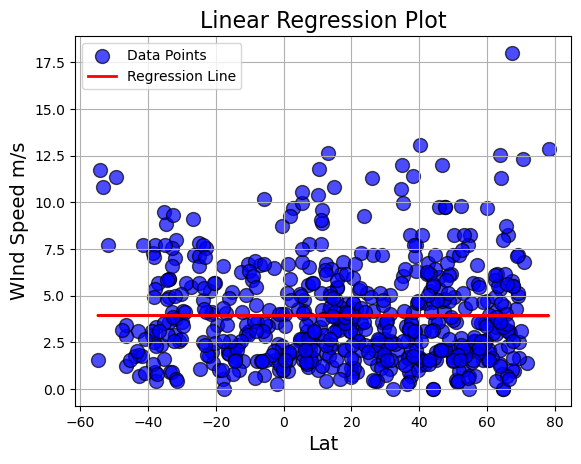

In [151]:
# Define a function to create Linear Regression plots
x_values= city_data_df['Lat'] 
y_values= city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

def create_linear_regression_plot(x_values, y_values, regress_values):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of the actual data points
plt.scatter(x_values, y_values, color='blue', edgecolor='black', s=100, alpha=0.7, label='Data Points')
    
    
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Regression Line')
    
    # Add graph properties
plt.title("Linear Regression Plot", fontsize=16)
plt.xlabel("Lat", fontsize=14)
plt.ylabel("WInd Speed m/s", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [153]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ginir,7.1333,40.7000,21.55,11,10,5.59,ET,1738680494
3,bam,29.1060,58.3570,11.83,22,0,3.61,IR,1738680496
4,marrakesh,31.6315,-8.0083,18.04,39,0,2.57,MA,1738680497
5,lata,40.1629,-8.3327,17.49,43,100,1.68,PT,1738680498
7,kodiak,57.7900,-152.4072,-6.27,93,20,2.06,US,1738680500


In [155]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.95,87,4,1.62,NZ,1738680492
2,margaret river,-33.9500,115.0667,18.54,69,0,5.87,AU,1738680495
6,port-aux-francais,-49.3500,70.2167,5.76,98,100,11.38,TF,1738680499
8,bethanie,-26.4833,17.1500,28.52,41,89,7.19,NaN,1738680501
9,edinburgh of the seven seas,-37.0676,-12.3116,15.05,70,32,5.70,SH,1738680503


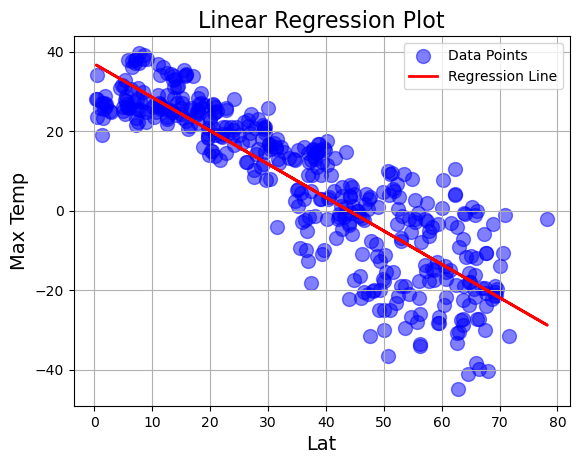

In [163]:
# Temperature vs. Latitiude 

# Linear regression on Northern Hemisphere
x_values= northern_hemi_df['Lat'] 
y_values= northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

def create_linear_regression_plot(x_values, y_values, regress_values):
    plt.figure(figsize=(15, 10))
    
    # Scatter plot of the actual data points
plt.scatter(x_values, y_values, color='blue',  s=100, alpha=0.5, label='Data Points')
    
    
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Regression Line')
    
    # Add graph properties
plt.title("Linear Regression Plot", fontsize=16)
plt.xlabel("Lat", fontsize=14)
plt.ylabel("Max Temp", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

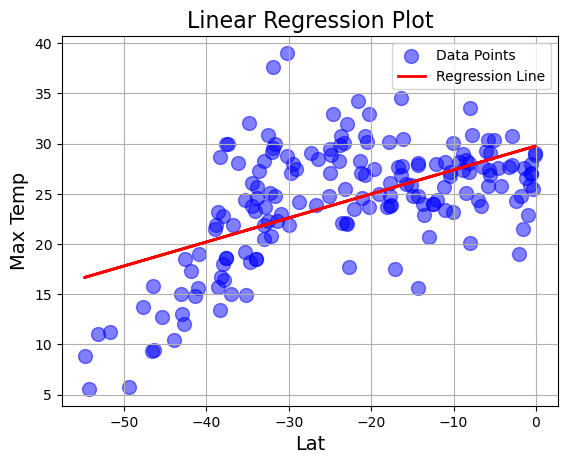

In [164]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df['Lat'] 
y_values= southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

def create_linear_regression_plot(x_values, y_values, regress_values):
    plt.figure(figsize=(15, 10))
    
    # Scatter plot of the actual data points
plt.scatter(x_values, y_values, color='blue',  s=100, alpha=0.5, label='Data Points')
    
    
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Regression Line')
    
    # Add graph properties
plt.title("Linear Regression Plot", fontsize=16)
plt.xlabel("Lat", fontsize=14)
plt.ylabel("Max Temp", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

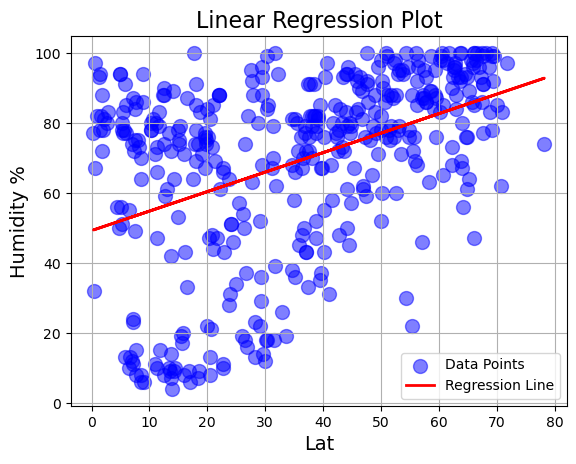

In [165]:
# Humidity vs. Latitude

# Northern Hemisphere
x_values= northern_hemi_df['Lat'] 
y_values= northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

def create_linear_regression_plot(x_values, y_values, regress_values):
    plt.figure(figsize=(15, 10))
    
    # Scatter plot of the actual data points
plt.scatter(x_values, y_values, color='blue',  s=100, alpha=0.5, label='Data Points')
    
    
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Regression Line')
    
    # Add graph properties
plt.title("Linear Regression Plot", fontsize=16)
plt.xlabel("Lat", fontsize=14)
plt.ylabel("Humidity %", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

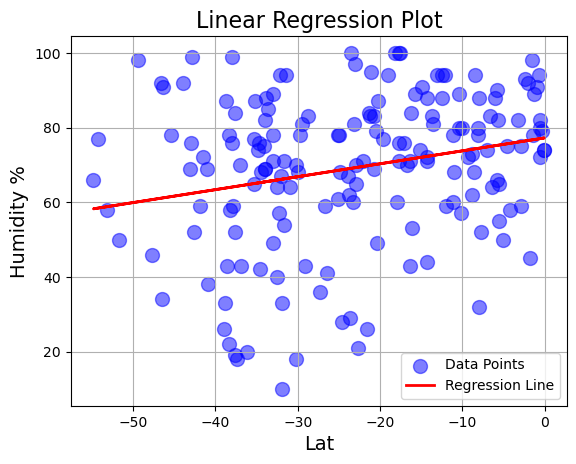

In [166]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat'] 
y_values= southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

def create_linear_regression_plot(x_values, y_values, regress_values):
    plt.figure(figsize=(15, 10))
    
    # Scatter plot of the actual data points
plt.scatter(x_values, y_values, color='blue',  s=100, alpha=0.5, label='Data Points')
    
    
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Regression Line')
    
    # Add graph properties
plt.title("Linear Regression Plot", fontsize=16)
plt.xlabel("Lat", fontsize=14)
plt.ylabel("Humidity %", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

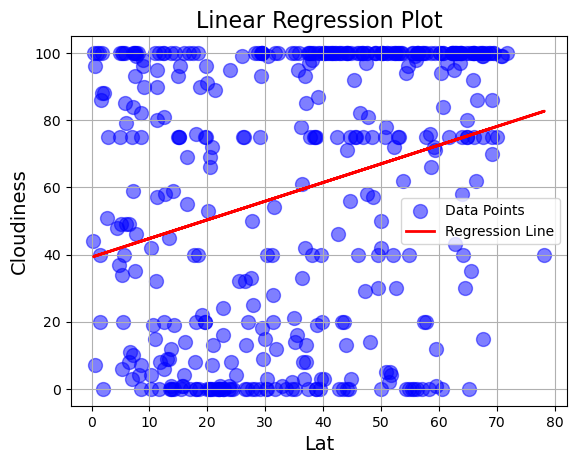

In [169]:
# Cloudiness vs. Latitude Linear Regression
# Northern Hemisphere
x_values=northern_hemi_df['Lat'] 
y_values= northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

def create_linear_regression_plot(x_values, y_values, regress_values):
    plt.figure(figsize=(15, 10))
    
    # Scatter plot of the actual data points
plt.scatter(x_values, y_values, color='blue',  s=100, alpha=0.5, label='Data Points')
    
    
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Regression Line')
    
    # Add graph properties
plt.title("Linear Regression Plot", fontsize=16)
plt.xlabel("Lat", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

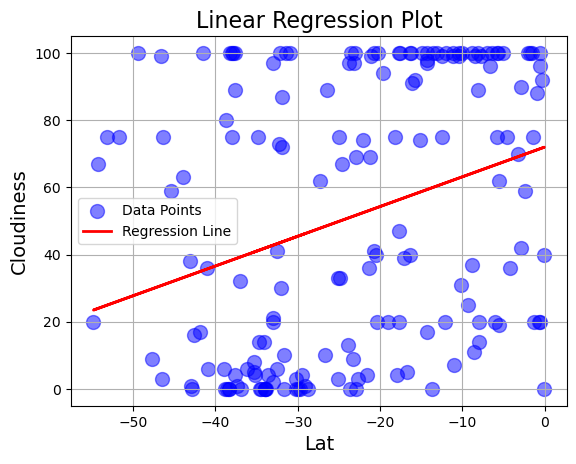

In [170]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat'] 
y_values= southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

def create_linear_regression_plot(x_values, y_values, regress_values):
    plt.figure(figsize=(15, 10))
    
    # Scatter plot of the actual data points
plt.scatter(x_values, y_values, color='blue',  s=100, alpha=0.5, label='Data Points')
    
    
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Regression Line')
    
    # Add graph properties
plt.title("Linear Regression Plot", fontsize=16)
plt.xlabel("Lat", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

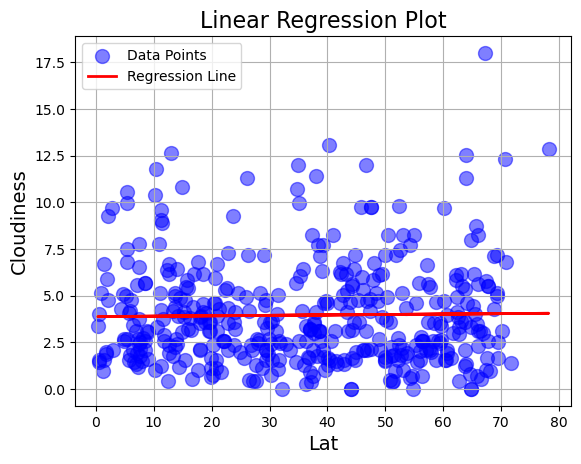

In [171]:
# Wind Speed vs Latitude
# Northern Hemisphere

x_values=northern_hemi_df['Lat'] 
y_values= northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

def create_linear_regression_plot(x_values, y_values, regress_values):
    plt.figure(figsize=(15, 10))
    
    # Scatter plot of the actual data points
plt.scatter(x_values, y_values, color='blue',  s=100, alpha=0.5, label='Data Points')
    
    
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Regression Line')
    
    # Add graph properties
plt.title("Linear Regression Plot", fontsize=16)
plt.xlabel("Lat", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

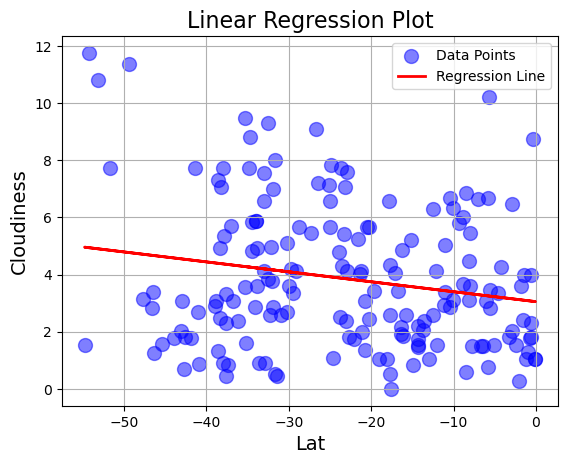

In [179]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat'] 
y_values= southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

def create_linear_regression_plot(x_values, y_values, regress_values):
    plt.figure(figsize=(15, 10))
    
    # Scatter plot of the actual data points
plt.scatter(x_values, y_values, color='blue',  s=100, alpha=0.5, label='Data Points')
    
    
plt.plot(x_values, regress_values, "r-", linewidth=2, label='Regression Line')
    
    # Add graph properties
plt.title("Linear Regression Plot", fontsize=16)
plt.xlabel("Lat", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Discussion: